In [1]:
# Imports
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

import load_data as ld
import analysis as ana

from PIL import Image
from datetime import datetime

In [2]:
# Values of interest
date_name = "created_at"
ppm_name = "PM2.5_ATM_ug/m3"

# Load data
data = ld.load_data(date_name, ppm_name)

In [3]:
import requests

upper_left = str(np.min(data["lat"])) + "," + str(np.min(data["long"]))
lower_right = str(np.max(data["lat"])) + "," + str(np.max(data["long"]))
coords = lower_right + "," + upper_left
print(coords)

key = "wTPDkAtbI9q93RXHsKO1JwWxsFfB4Ao2"
query = "https://open.mapquestapi.com/staticmap/v5/map?key=" + key + "&boundingBox=" + "39.726463,-105.040846,39.709429,-105.255924" + "&size=600,400"  # TODO: Normalize size

response = requests.get(query)
imageStream = io.BytesIO(response.content)
image = Image.open(imageStream)
image.save("images/org_data" + str(datetime.now()) + ".jpg")

39.826463,-105.040846,39.709429,-105.255924


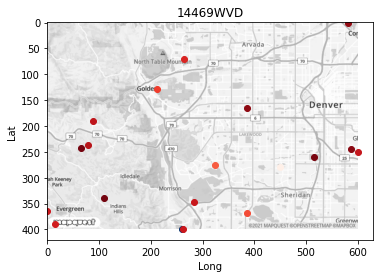

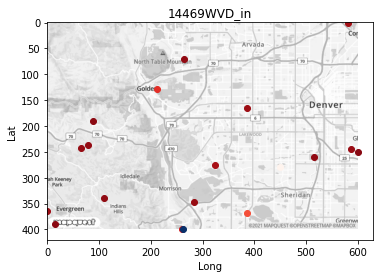

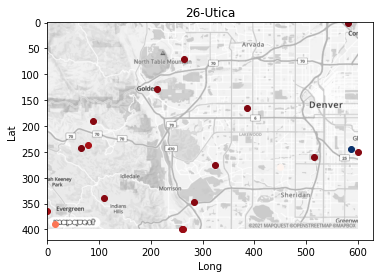

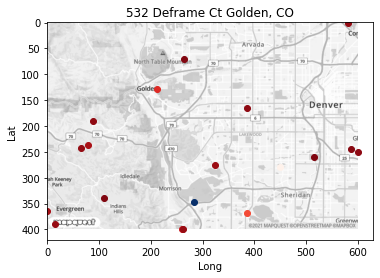

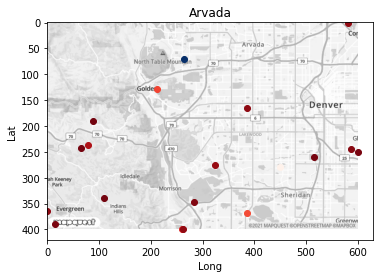

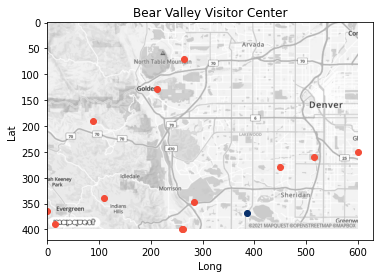

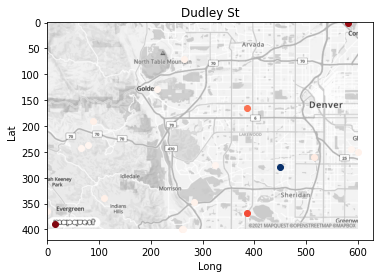

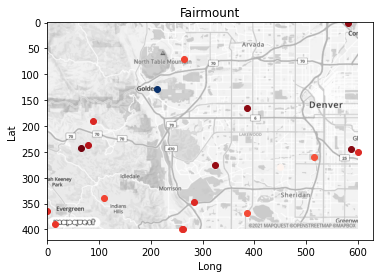

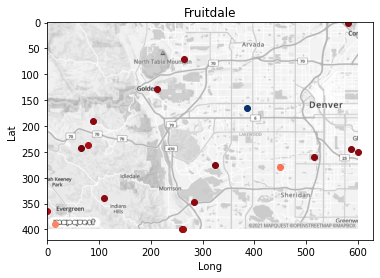

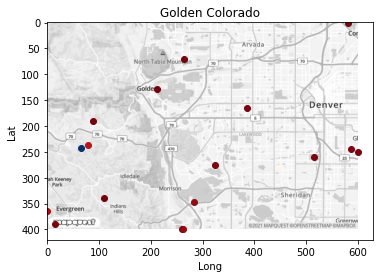

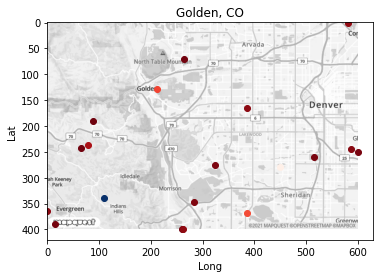

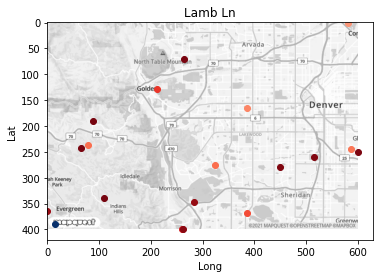

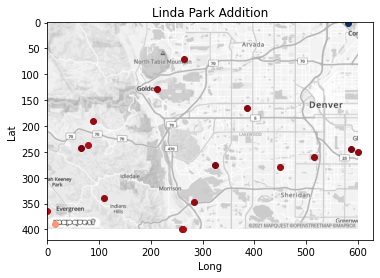

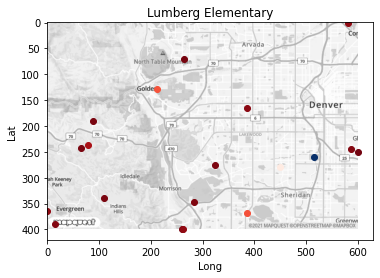

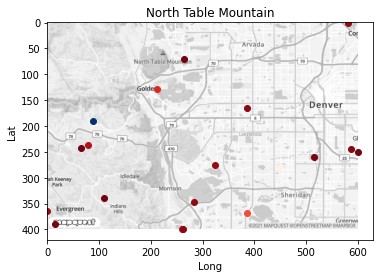

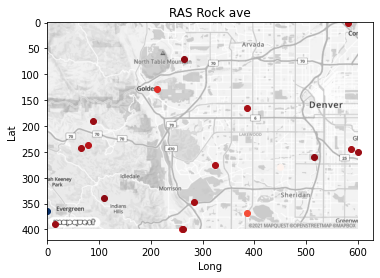

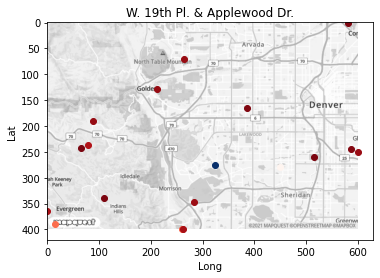

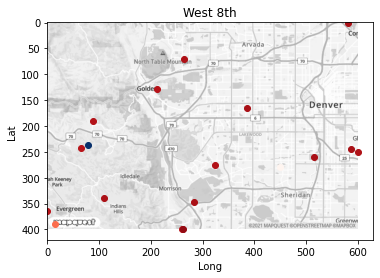

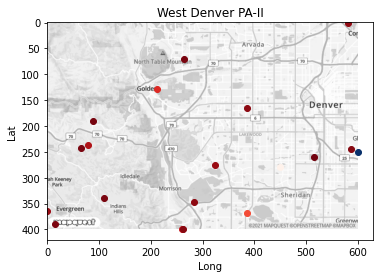

In [8]:
padding = 0.01

image_gray = image.convert("LA")


for reference_location in np.unique(data["location"]):
    plt.imshow(image_gray)
    plt.plot()

    for location in np.unique(data["location"]):
        selected_df = data[data["location"] == location]
        lat = selected_df["lat"].iloc[0]
        lat = 400 - 400 * (lat - np.min(data["lat"])) / (np.max(data["lat"]) - np.min(data["lat"]))  # Make negative

        long = selected_df["long"].iloc[0]
        long = 600 * (long - np.min(data["long"])) / (np.max(data["long"]) - np.min(data["long"]))

        rmse = ana.get_rmse(data, reference_location, location, date_name, ppm_name) / 170 # TODO Make this dynamic
        if location == reference_location:
            color = cm.Blues(1.0)
        else:
            color = cm.Reds(1 - rmse)
            # color = cm.Greys(1.0)
        plt.scatter(long, lat, c=[color])
        plt.title(reference_location)
        plt.xlabel("Long")
        plt.ylabel("Lat")
    plt.show()

In [5]:
def get_cor(data, name_a, name_b, date_name, ppm_name):
    df_a = data[data["location"] == name_a]
    df_b = data[data["location"] == name_b]

    # Drop na and zero ppm values
    merged_df = df_a.merge(df_b, on=[date_name])
    ppm_x_name = ppm_name + "_x"
    ppm_y_name = ppm_name + "_y"
    merged_df = merged_df[merged_df[ppm_x_name] > 0]
    merged_df = merged_df[merged_df[ppm_y_name] > 0]
    merged_df.dropna(subset=[ppm_x_name, ppm_y_name])

    corr = np.corrcoef(merged_df[ppm_x_name], merged_df[ppm_y_name])
    return corr

Lamb Ln
RAS Rock ave


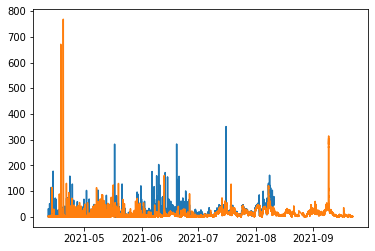

0.45948154310695294


In [17]:
index_0 = 11
index_1 = 15
print(np.unique(data["location"])[index_0])
print(np.unique(data["location"])[index_1])

selected_df_0 = data[data["location"] == np.unique(data["location"])[index_0]]
selected_df_1 = data[data["location"] == np.unique(data["location"])[index_1]]

plt.plot(selected_df_0[date_name], selected_df_0[ppm_name])
plt.plot(selected_df_1[date_name], selected_df_1[ppm_name])
plt.show()

corr = get_cor(data,
               np.unique(data["location"])[index_0],
               np.unique(data["location"])[index_1],
               date_name,
               ppm_name)

print(corr[0][1])

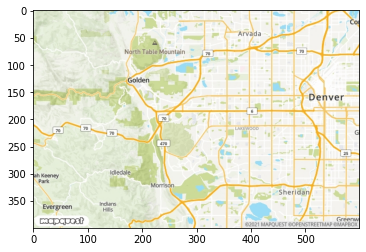

In [7]:
imageStream = io.BytesIO(response.content)
image = Image.open(imageStream)
plt.imshow(image)
plt.plot()

print()